Pregnancies: homilador bo'lish soni



Glucose: glyukozaga test natijasi



BloodPressure: diastolik qon bosimi (mm Hg)



SkinThickness: Triceps teri burmasining qalinligi (mm)



Insulin: 2 soatlik sarum insulini (mu U/ml)



BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)



DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi



Age: Yosh (yil)



Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [3]:
url=r"D:\users\diabetes.csv"
df= pd.read_csv(url,index_col=0)
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [6]:
df.isnull().sum()


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
corr_matrix= df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df.corrwith(df['BMI']).abs().sort_values(ascending=False)

BMI                         1.000000
SkinThickness               0.392573
Outcome                     0.292695
BloodPressure               0.281805
Glucose                     0.221071
Insulin                     0.197859
DiabetesPedigreeFunction    0.140647
Age                         0.036242
dtype: float64

In [9]:
df.shape

(768, 8)

In [11]:
X, y = df.drop('Outcome', axis=1).values, df['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)


,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [14]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')


In [16]:


for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    y_predict = knn.predict(X_test_scaled)
    print(k, recall_score(y_test, y_predict))

1 0.5925925925925926
2 0.5925925925925926
3 0.5185185185185185
4 0.5925925925925926
5 0.5370370370370371
6 0.5740740740740741
7 0.5555555555555556
8 0.5
9 0.5185185185185185
10 0.5


In [17]:
y_predict = knn.predict(X_test_scaled)
y_predict[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [18]:
print(X_test.shape)
print(X_test_scaled.shape)

(154, 7)
(154, 7)


# baholash

## JACCARD index

In [19]:

jaccard_score = jaccard_score(y_test, y_predict)
print(jaccard_score)


0.4090909090909091


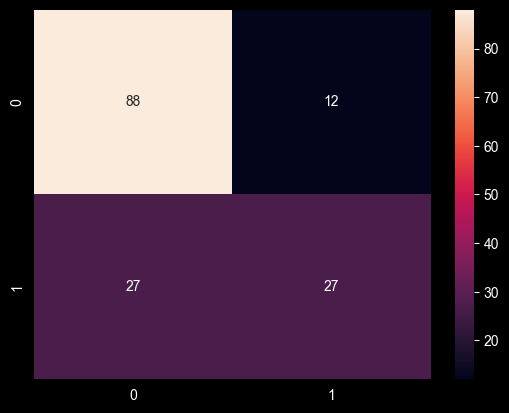

In [20]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [21]:
confusion_matrix(y_test, y_predict)

array([[88, 12],
       [27, 27]])

In [22]:

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [23]:
#cross validation
from sklearn.model_selection import cross_val_predict
print("Crossification: \n", classification_report(y_test, y_predict))

Crossification: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



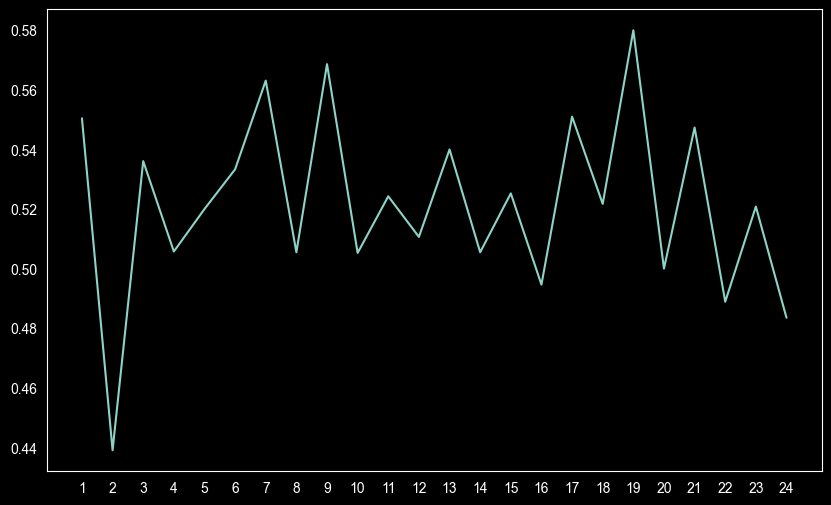

In [24]:

f1=[]

for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1, 25), f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()


In [27]:

param_grid = {'n_neighbors':np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsCla..._neighbors=24)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': array([ 1, 2..., 22, 23, 24])}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold 

In [28]:
knn_gscv.best_params_

{'n_neighbors': np.int64(14)}

In [29]:
knn_gscv.best_score_

np.float64(0.7704384912701586)

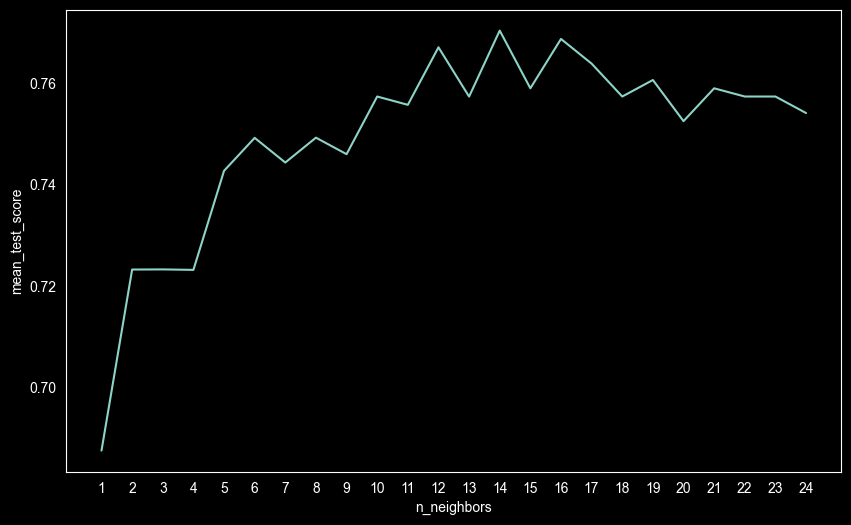

In [30]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'],knn_gscv.cv_results_['mean_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.grid()
plt.show()